<a href="https://www.kaggle.com/code/quangnamvu/report4-svm-classification-animal?scriptVersionId=179661264" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Vũ Quang Nam 20215622**

**Ứng dụng SVM cho bài toán phân loại ảnh chó - mèo**

**GVHD: Ts. Đỗ Tiến Dũng**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:

#Giải nén tập dữ liệu
from zipfile import ZipFile

dataset_train = "/kaggle/input/dogs-vs-cats/train.zip"
    
with ZipFile(dataset_train, 'r') as zip:
    zip.extractall()

In [3]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [4]:

folder_path = f"Dataset/"
os.makedirs(folder_path, exist_ok=True)

# define path
confusion_image_path = os.path.join(folder_path, 'confusion matrix.png')
classification_file_path = os.path.join(folder_path, 'classification_report.txt')
model_file_path = os.path.join(folder_path, "svm_model.pkl")

# Path dataset
# dataset_dir = "Dataset/"
# train_dir = os.path.join(dataset_dir, "train")
# test_dir = os.path.join(dataset_dir, "test1")
train_dir = "train"
test_dir = "test1"

In [5]:

#tải dữ liệu, tiền xử lí, gán nhãn
# dog = 1, cat = 0
train_images = os.listdir(train_dir)
features = []
labels = []
image_size = (50, 50)

# xử lí dữ liệu ảnh huấn luyện
for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread(train_dir+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

Processing Train Images: 100%|██████████| 25000/25000 [00:45<00:00, 548.61it/s]


In [6]:
del train_images

In [7]:
features = np.asarray(features)
labels = np.asarray(labels)

# train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [8]:
del features
del labels

In [9]:
# PCA, SVM, & Pipeline
n_components = 0.8
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [10]:
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [11]:
# training
start_time = time.time()

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)


end_time = time.time()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.539 total time=  20.8s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.529 total time=  20.4s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.535 total time=  21.0s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.571 total time=  13.4s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.571 total time=  13.6s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.561 total time=  13.4s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.549 total time=  11.9s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.554 total time=  11.9s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.497 total time=  12.8s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.504 total time=  13.3s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.500 total time=  12.9s
[CV 3/

In [12]:
del X_train
del y_train

In [19]:
# Tính tổng thời gian huấn luyện
training_time = end_time - start_time

# Chuyển đổi thời gian sang giờ, phút, giây
hours, remainder = divmod(training_time, 3600)
minutes, seconds = divmod(remainder, 60)

# In ra thời gian huấn luyện
print(f"Thời gian huấn luyện: {int(hours)} giờ {int(minutes)} phút {seconds:.2f} giây")



Thời gian huấn luyện: 3 giờ 3 phút 22.69 giây


In [13]:
# Lấy các tham số & mô hình tốt nhất
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'pca__n_components': 0.9, 'svm__kernel': 'rbf'}
Best Score:  0.6771500158865443


In [14]:

# Lưu mô hình tốt nhất
model_filename = 'best_model.joblib'
joblib.dump(best_pipeline, model_filename)

print(f"Model saved as {model_filename}")

Model saved as best_model.joblib


In [15]:
# Đánh giá với tập dữ liệu test
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6752


In [16]:
y_pred = best_pipeline.predict(X_test)

# classification report
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

with open(classification_file_path, 'w') as file:
    file.write(classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.68      0.68      0.68      2520
         Dog       0.67      0.67      0.67      2480

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



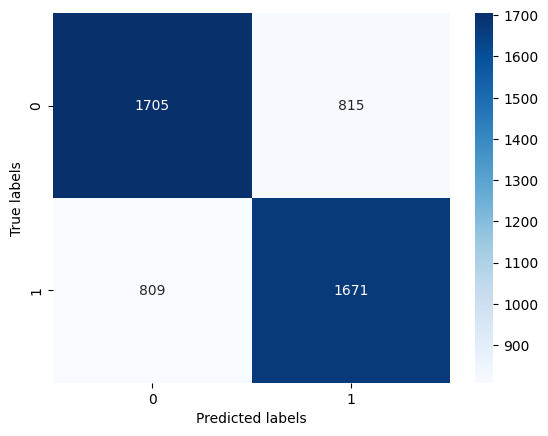

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig(confusion_image_path)
plt.show()